In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mpl_toolkits.mplot3d as Axes3d

In [40]:
linear = pd.read_csv("linear.csv")
linear["collision load [-]"]=linear["collision count [inserts]"]/linear["current load [items]"]
linear["average load factor [%]"]=100*linear["average load factor [-]"]
linear

,Inserts [Items],Lookups [Items],Initial Table Size [Slots],current size [slots],current load [items],load factor [-],step size [-],collision count [inserts],average probe length [items],lookup time [ms],insert time [ms],average load factor [-],collision load [-],average load factor [%]
0,1000,1000,2,1024.0,994.0,97.0,1.0,482.0,11.229,0.390,1.396,0.486,0.484909,48.6
1,1000,1000,3,1536.0,994.0,64.0,1.0,287.0,0.881,0.291,1.471,0.324,0.288732,32.4
2,1000,1000,5,1280.0,994.0,77.0,1.0,389.0,1.483,0.308,1.360,0.389,0.391348,38.9
3,1000,1000,7,1792.0,994.0,55.0,1.0,270.0,0.545,0.302,1.590,0.278,0.271630,27.8
4,1000,1000,9,1152.0,994.0,86.0,1.0,409.0,2.177,0.517,2.185,0.432,0.411469,43.2
5,1000,1000,11,1408.0,994.0,70.0,1.0,354.0,1.167,0.317,1.406,0.353,0.356137,35.3
6,1000,1000,13,1664.0,994.0,59.0,1.0,289.0,0.710,0.302,1.608,0.299,0.290744,29.9
7,1000,1000,15,1920.0,994.0,51.0,1.0,246.0,0.504,0.383,2.042,0.259,0.247485,25.9
8,1000,1000,17,1088.0,994.0,91.0,1.0,450.0,4.446,0.335,1.315,0.457,0.452716,45.7
9,1000,1000,19,1216.0,994.0,81.0,1.0,393.0,2.105,0.561,2.284,0.409,0.395372,40.9


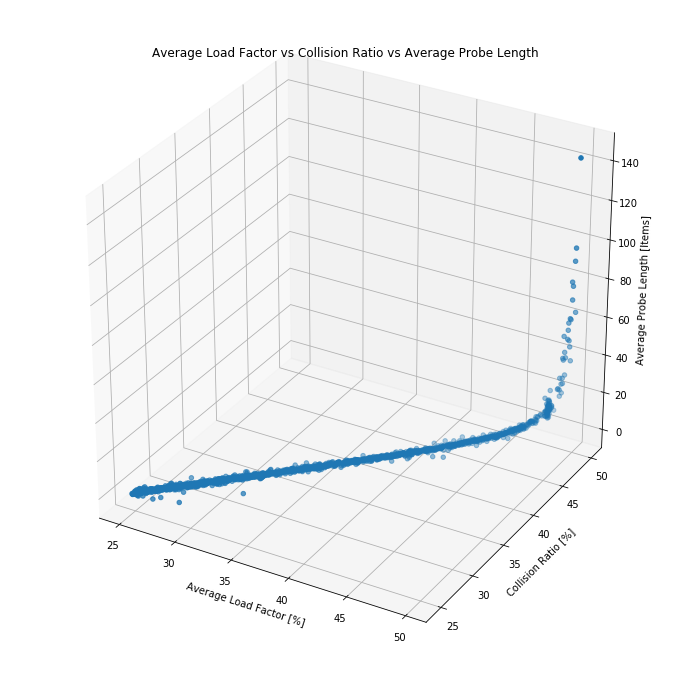

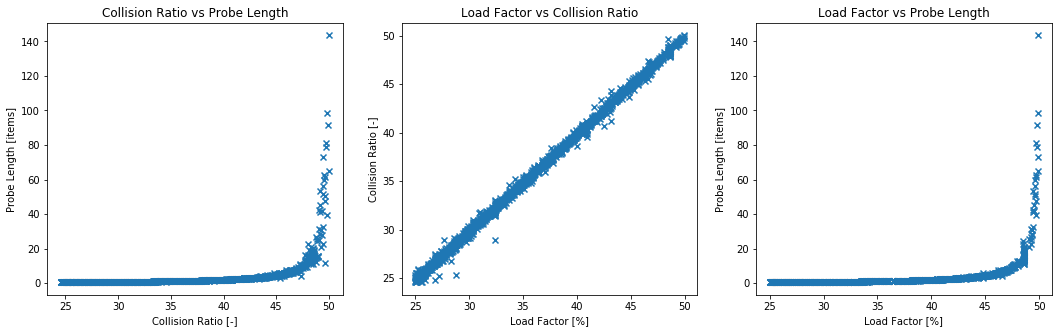

<function matplotlib.pyplot.clf>

In [39]:
figure_size = (12,12)
collision_load = 100*linear["collision load [-]"].values
collision_count = linear["collision count [inserts]"]
probe_length = linear["average probe length [items]"].values
load_factor = linear["average load factor [%]"].values

# On collision probe length 3d scatter
plt.cla()
plt.clf()
scatter_figure = plt.figure(figsize=figure_size)
ax = scatter_figure.add_subplot(111,projection='3d')

ax.scatter(load_factor, collision_load,probe_length)
ax.set_xlabel('Average Load Factor [%]')
ax.set_zlabel('Average Probe Length [Items]')
ax.set_ylabel('Collision Ratio [%]')
ax.set_title("Average Load Factor vs Collision Ratio vs Average Probe Length")

fig, axes = plt.subplots(1,3, figsize=(18,5))
# Get 2d scatter graphs
axes[0].scatter(collision_load, probe_length, marker='x')
axes[0].set_xlabel("Collision Ratio [-]")
axes[0].set_title("Collision Ratio vs Probe Length")
axes[0].set_ylabel("Probe Length [items]")

axes[1].scatter(load_factor, collision_load, marker='x')
axes[1].set_xlabel("Load Factor [%]")
axes[1].set_ylabel("Collision Ratio [-]")
axes[1].set_title("Load Factor vs Collision Ratio")

axes[2].scatter(load_factor, probe_length, marker='x')
axes[2].set_xlabel("Load Factor [%]")
axes[2].set_ylabel("Probe Length [items]")
axes[2].set_title("Load Factor vs Probe Length")
plt.show()
plt.cla()
plt.clf

In [56]:
xtndbln = pd.read_csv("xtndbln.csv")
xtndbln["average insert time [milli sec]"] = xtndbln["insert time [ms]"]/xtndbln["Inserts [Items]"]

# Average lookup time is imported as milllisec not microsec hence the voodoo below
xtndbln["average lookup time [micro sec]"] = 1000*xtndbln["lookup time [micro s]"]/xtndbln["Lookups [Items]"]
xtndbln["load factor [%]"]=100*xtndbln["key count [keys]"]/(xtndbln["bucket size [slots]"]*xtndbln["bucket count [buckets]"])


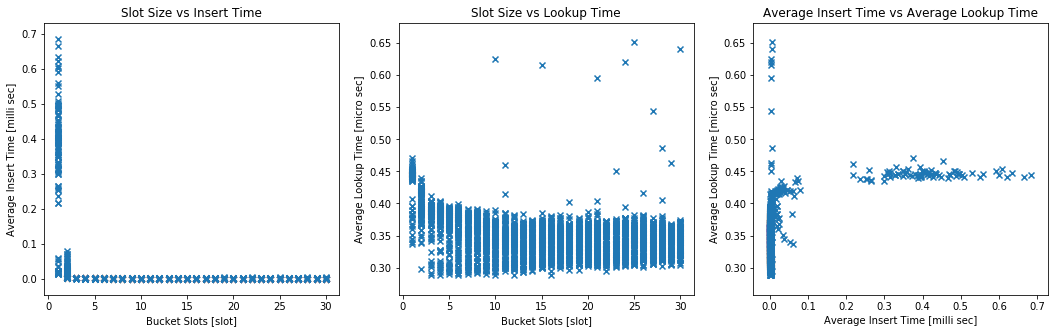

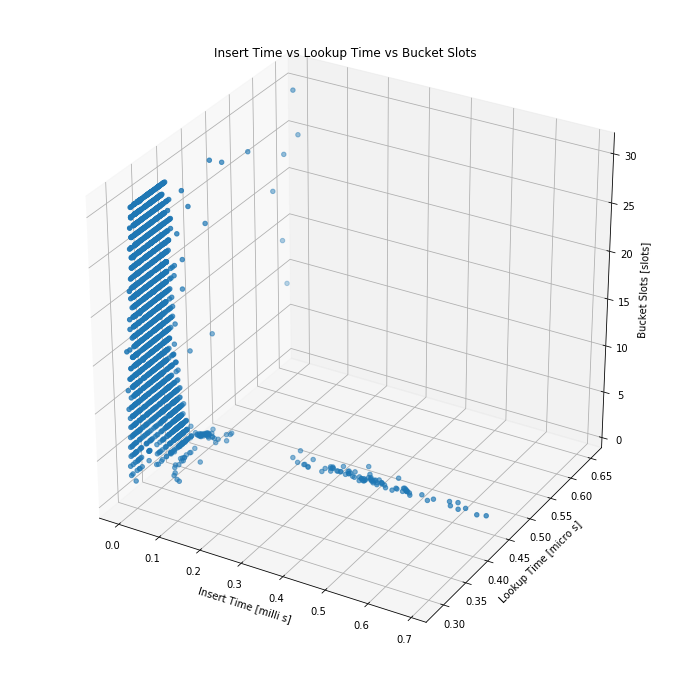

In [44]:
plt.cla();plt.clf()
figure_size = (12,12)
insert_time = xtndbln["average insert time [milli sec]"].values
lookup_time = xtndbln["average lookup time [micro sec]"]
bucket_slots = xtndbln["bucket size [slots]"].values

fig, axes = plt.subplots(1,3, figsize=(18,5))
axes[0].scatter(bucket_slots, insert_time, marker='x')
axes[0].set_xlabel("Bucket Slots [slot]")
axes[0].set_ylabel("Average Insert Time [milli sec]")
axes[0].set_title("Slot Size vs Insert Time")

axes[1].scatter(bucket_slots, lookup_time, marker='x')
axes[1].set_xlabel("Bucket Slots [slot]")
axes[1].set_ylabel("Average Lookup Time [micro sec]")
axes[1].set_title("Slot Size vs Lookup Time")

axes[2].scatter(insert_time, lookup_time, marker='x')
axes[2].set_xlabel("Average Insert Time [milli sec]")
axes[2].set_ylabel("Average Lookup Time [micro sec]")
axes[2].set_title("Average Insert Time vs Average Lookup Time")

scatter_figure = plt.figure(figsize=figure_size)
ax = scatter_figure.add_subplot(111,projection='3d')
ax.scatter(insert_time, lookup_time,bucket_slots)
ax.set_xlabel('Insert Time [milli s]')
ax.set_ylabel('Lookup Time [micro s]')
ax.set_zlabel('Bucket Slots [slots]')
ax.set_title("Insert Time vs Lookup Time vs Bucket Slots")

plt.show()
plt.cla()
plt.clf()

In [82]:
cuckoo = pd.read_csv("cuckoo.csv")
xuckoon = pd.read_csv("xuckoon.csv")
xuckoo = pd.read_csv("xuckoo.csv")


cuckoo["load factor [%]"]=100*cuckoo["keycount [keys]"]/(2*cuckoo["table size [slots]"])
cuckoo["average lookup time [micro sec]"]=1000*cuckoo["lookup time [ms]"]/cuckoo["Lookups [Items]"]
cuckoo["average insert time [micro sec]"]=1000*cuckoo["insert time [ms]"]/cuckoo["Inserts [Items]"]

xuckoo["load factor [%]"]=100*xuckoo["key count [keys]"]/xuckoo["bucket count [buckets]"]
xuckoo["average insert time [micro sec]"]=1000*xuckoo["insert time [ms]"]/xuckoo["Inserts [Items]"]
xuckoo["average lookup time [micro sec]"]=1000*xuckoo["lookup time [ms]"]/xuckoo["Lookups [Items]"]

xuckoon["load factor [%]"]=100*xuckoon["key count [keys]"]/(xuckoon["bucket count [buckets]"]*xuckoon["bucket size [slots]"])
xuckoon["average insert time [micro sec]"]=1000*xuckoon["insert time [ms]"]/xuckoon["Inserts [Items]"]
xuckoon["average lookup time [micro sec]"]=1000*xuckoon["lookup time [ms]"]/xuckoon["Lookups [Items]"]



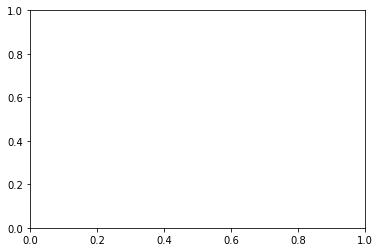

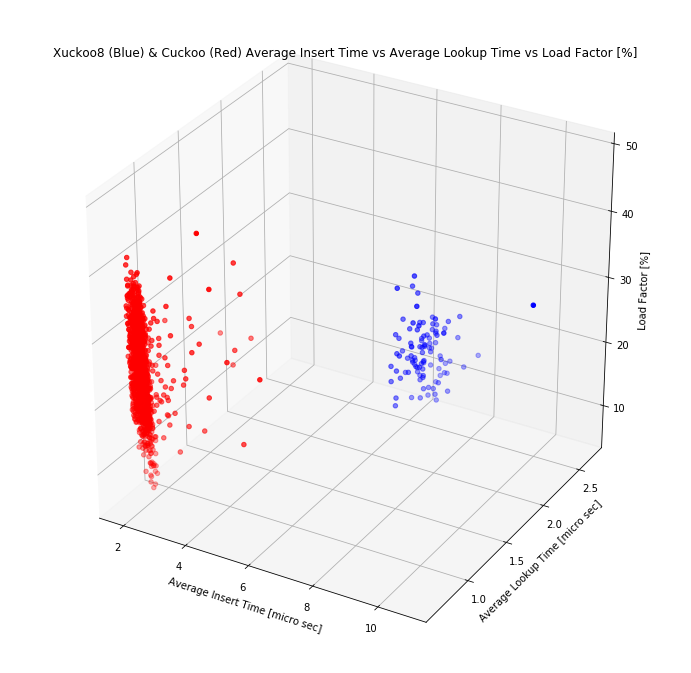

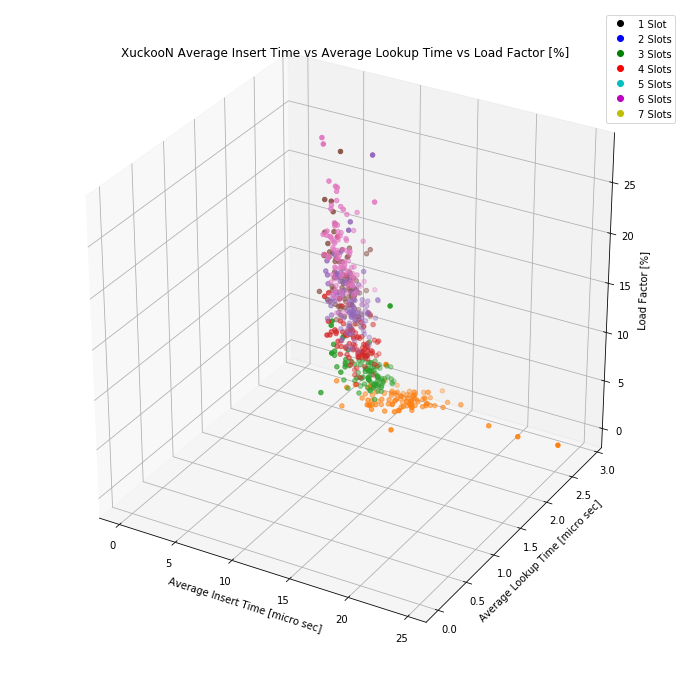

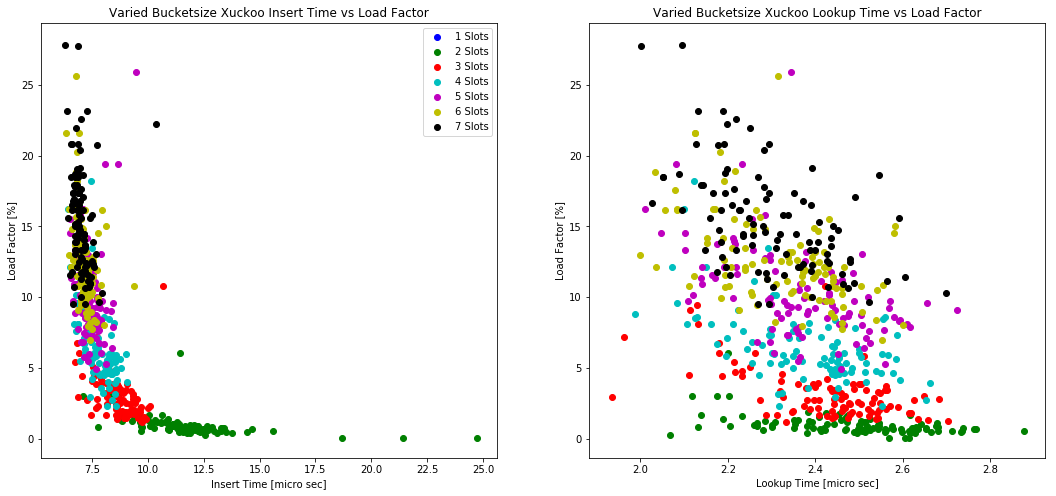

In [101]:
plt.clf()
plt.cla()

# cuckoo
insert_time=cuckoo["average insert time [micro sec]"]
lookup_time = cuckoo["average lookup time [micro sec]"]
load_factor = cuckoo["load factor [%]"]

ds = xuckoon.loc[xuckoon["bucket size [slots]"]==8]
dsinsert_time=ds["average insert time [micro sec]"]
dslookup_time = ds["average lookup time [micro sec]"]
dsload_factor = ds["load factor [%]"]

scatter_figure = plt.figure(figsize=figure_size)
ax = scatter_figure.add_subplot(111,projection='3d')
ax.scatter(insert_time, lookup_time,load_factor,color='r')
ax.scatter(dsinsert_time,dslookup_time,dsload_factor, color='b')
ax.set_xlabel('Average Insert Time [micro sec]')
ax.set_ylabel('Average Lookup Time [micro sec]')
ax.set_zlabel('Load Factor [%]')
ax.set_title("Xuckoo8 (Blue) & Cuckoo (Red) Average Insert Time vs Average Lookup Time vs Load Factor [%]")

#xuckoon

scatter_figure = plt.figure(figsize=figure_size)
ax= scatter_figure.add_subplot(111,projection='3d')
colors = ['b','g','r','c','m','y','k']
scatterproxy=list()
for i in range(1,8):
    scatterproxy.append(matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[i-2], marker='o'))
    ds = xuckoon.loc[xuckoon["bucket size [slots]"]==i]
    insert_time=ds["average insert time [micro sec]"]
    lookup_time = ds["average lookup time [micro sec]"]
    load_factor = ds["load factor [%]"]
    ax.scatter(insert_time, lookup_time,load_factor)
   
ax.legend(scatterproxy, ['1 Slot', '2 Slots', '3 Slots', '4 Slots', '5 Slots', '6 Slots', '7 Slots'], numpoints = 1)
ax.set_xlabel('Average Insert Time [micro sec]')
ax.set_ylabel('Average Lookup Time [micro sec]')
ax.set_zlabel('Load Factor [%]')
ax.set_title("XuckooN Average Insert Time vs Average Lookup Time vs Load Factor [%]")

    
fig, ax = plt.subplots(1,2,figsize=(18,8))
for i in range (1,8):
    ds = xuckoon.loc[xuckoon["bucket size [slots]"]==i]
    insert_time=ds["average insert time [micro sec]"]
    lookup_time = ds["average lookup time [micro sec]"]
    load_factor = ds["load factor [%]"]
    ax[0].scatter(insert_time, load_factor, c=colors[i-1],label="{:d} Slots".format(i))
    ax[1].scatter(lookup_time, load_factor, c=colors[i-1],label="{:d} Slots".format(i))

ax[0].set_xlabel("Insert Time [micro sec]")
ax[0].set_ylabel("Load Factor [%]")
ax[0].set_title("Varied Bucketsize Xuckoo Insert Time vs Load Factor")
ax[1].set_xlabel("Lookup Time [micro sec]")
ax[1].set_ylabel("Load Factor [%]")
ax[1].set_title("Varied Bucketsize Xuckoo Lookup Time vs Load Factor")

ax[0].legend()
plt.show()


In [68]:
xuckoon.head()
xuckoon.shape

(300, 11)

In [69]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [70]:
xuckoon.head()


,Inserts [Items],Lookups [Items],Initial Table Size [Slots],bucket count [buckets],bucket size [slots],key count [keys],lookup time [ms],insert time [ms],load factor [%],average insert time [micro sec],average lookup time [micro sec]
0,1000,2000,1,1310720.0,1.0,993.0,4.539,39.789,0.075760,39.789,2.2695
1,1000,2000,2,12288.0,2.0,993.0,4.550,7.000,4.040527,7.000,2.2750
2,1000,2000,3,4096.0,3.0,993.0,4.080,6.613,8.081055,6.613,2.0400
3,1000,2000,4,1536.0,4.0,993.0,4.211,6.510,16.162109,6.510,2.1055
4,1000,2000,5,768.0,5.0,993.0,4.333,13.162,25.859375,13.162,2.1665
